In [1]:
import pandas as pd

# Load the dataset from the provided CSV file
df = pd.read_csv("cardio_train.csv", sep=";")

# Drop the 'id' column as it does not contribute to the analysis
df.drop("id", axis=1, inplace=True)

# Check for missing values
print(df.isnull().sum())


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


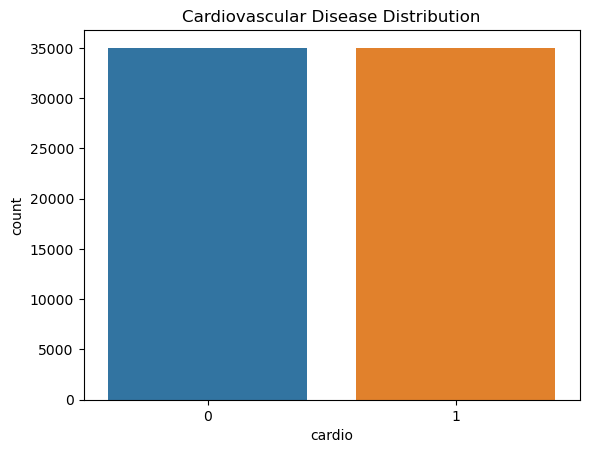

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (cardio)
sns.countplot(x='cardio', data=df)
plt.title('Cardiovascular Disease Distribution')
plt.show()

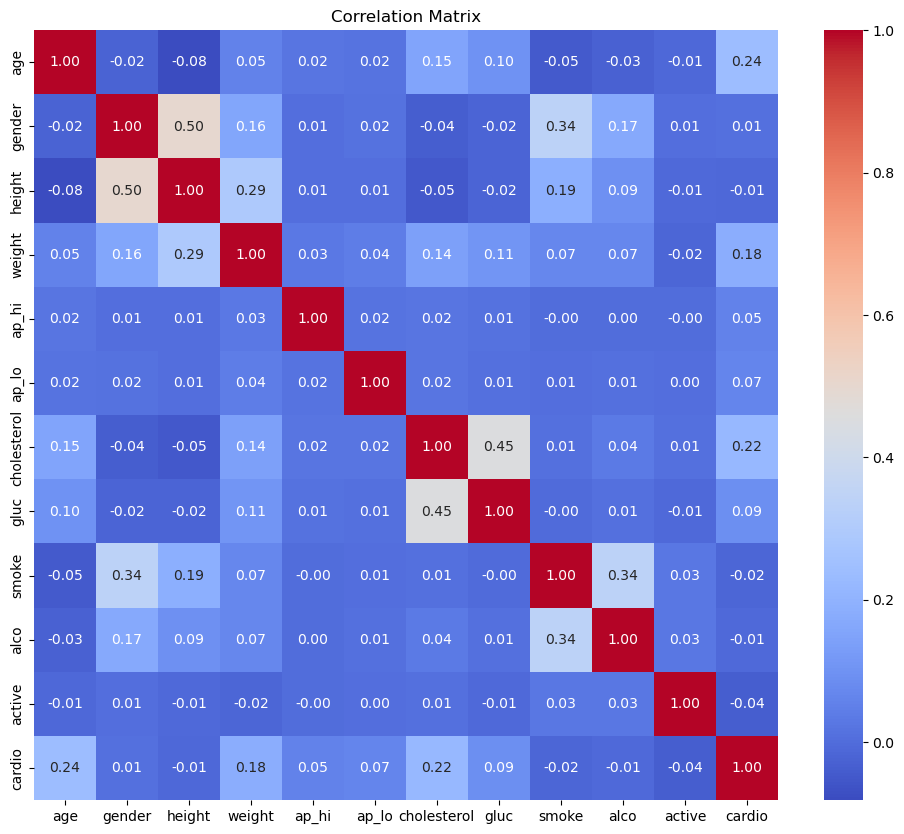

In [3]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Further Data Analysis and Visualization:
Beyond the basic visualization,weu can explore relationships between specific features and the target variable using various plots. For instance:

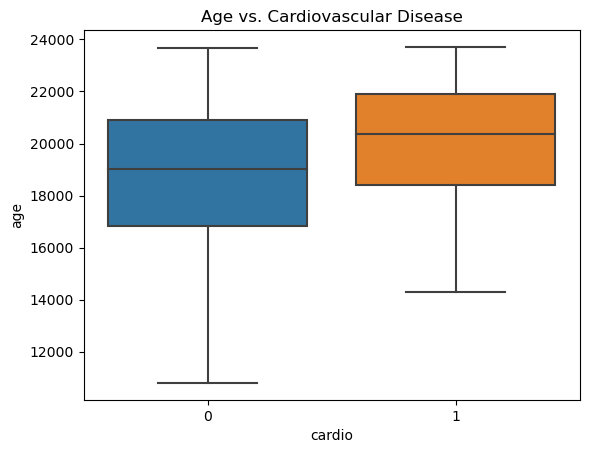

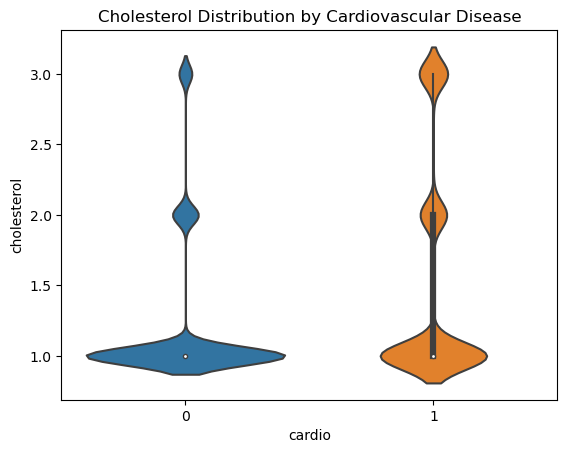

In [4]:
# Visualize the relationship between 'age' and 'cardio'
sns.boxplot(x='cardio', y='age', data=df)
plt.title('Age vs. Cardiovascular Disease')
plt.show()

# Visualize the distribution of 'cholesterol' with respect to 'cardio'
sns.violinplot(x='cardio', y='cholesterol', data=df)
plt.title('Cholesterol Distribution by Cardiovascular Disease')
plt.show()


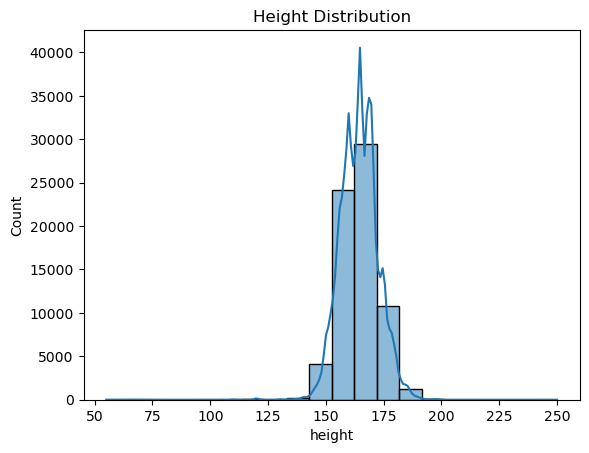

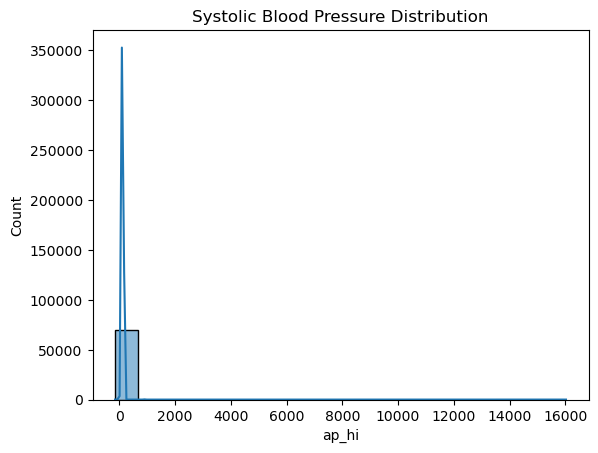

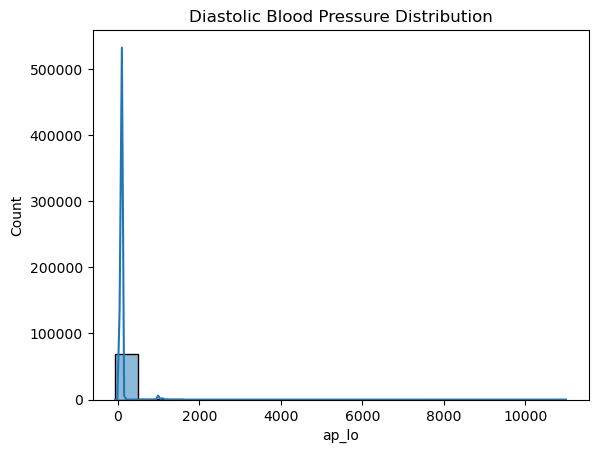

In [5]:
# Visualize the distribution of 'height'
sns.histplot(df['height'], bins=20, kde=True)
plt.title('Height Distribution')
plt.show()

# Visualize the distribution of 'ap_hi' (systolic blood pressure)
sns.histplot(df['ap_hi'], bins=20, kde=True)
plt.title('Systolic Blood Pressure Distribution')
plt.show()

# Visualize the distribution of 'ap_lo' (diastolic blood pressure)
sns.histplot(df['ap_lo'], bins=20, kde=True)
plt.title('Diastolic Blood Pressure Distribution')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('cardio', axis=1)
y = df['cardio']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
svm_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Fit the models on the training data
svm_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
svm_preds = svm_model.predict(X_test_scaled)
knn_preds = knn_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test_scaled)
lr_preds = lr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate the models
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_preds))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Classification Report for the best-performing model (Random Forest)
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_preds))

Support Vector Machine Accuracy: 0.7319285714285715
K-Nearest Neighbors Accuracy: 0.6499285714285714
Decision Tree Accuracy: 0.6291428571428571
Logistic Regression Accuracy: 0.7236428571428571
Random Forest Accuracy: 0.7175714285714285
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.71      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

